<a href="https://colab.research.google.com/github/Hansika2346/AIML_2303A52409/blob/main/ass_10.1_2303a52409_GEN%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN input (28x28 images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [16]:
model = keras.Sequential([
    # Convolutional layers
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Flattening layer
    keras.layers.Flatten(),

    # Fully connected layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(x_train, y_train, epochs=10,batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9810 - loss: 0.0629 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9863 - loss: 0.0459 - val_accuracy: 0.9907 - val_loss: 0.0345
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9880 - val_loss: 0.0385
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9912 - loss: 0.0302 - val_accuracy: 0.9920 - val_loss: 0.0278
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9933 - val_loss: 0.0252
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accuracy: 0.9909 - val_loss: 0.0304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9951 - loss: 0.0179 - val_accuracy: 0.9911 - val_loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9955 -

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 3s - 10ms/step - accuracy: 0.1306 - loss: 2.3016

Test Accuracy: 0.1306


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


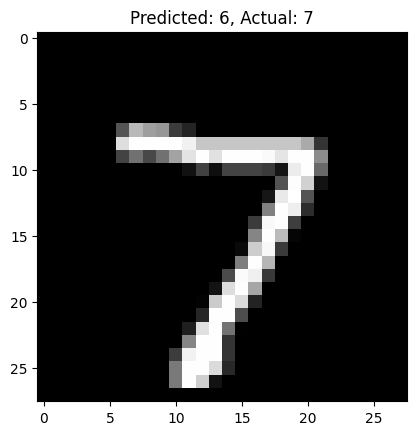

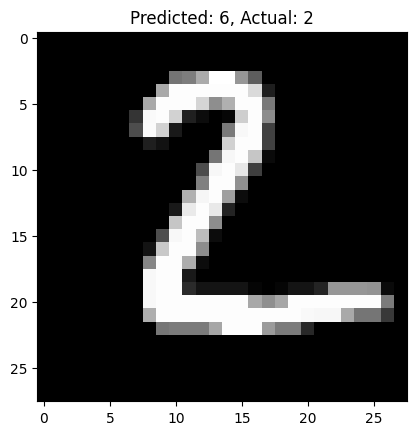

In [18]:
predictions = model.predict(x_test)

# Plot some predictions
def plot_image(index):
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.show()

# Display example predictions
plot_image(0)
plot_image(1)


In [19]:
model.save("mnist_cnn_model.h5")